# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1), chronicles all recorded space missions since the dawn of the Space Race in 1957, marking the historic rivalry between the USA and the Soviet Union. It contains a wealth of information, including mission statuses (success or failure), mission costs, the frequency of launches by country, and many other fascinating insights. In this project, I will delve into the dataset to uncover key statistics and trends, offering a deeper understanding of humanity's journey into space.

### Install Package with Country Codes

In [343]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [345]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [347]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [349]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration
#### the questions trying to answer
* What is the shape of the dataset? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [351]:
df_data.shape

(4324, 9)

In [352]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [353]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [354]:
df_data.isnull().values.sum()

3360

## Data Cleaning - Check for Missing Values and Duplicates

#### items that are checked below for cleaning up dataframe:
* check for missing values and handle the missing values.
* check for duplicates
* handle date column

In [356]:
df_data.sample(5, random_state= 103)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1835,1835,1835,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Mar 20, 1990 00:25 UTC",Cosmos-3M (11K65M) | Cosmos 2061,StatusRetired,NaN,Success
2485,2485,2485,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Mon Jan 14, 1980 19:49 UTC",Cosmos-3M (11K65M) | Cosmos 1150,StatusRetired,NaN,Success
4101,4101,4101,US Air Force,"SLC-5, Vandenberg AFB, California, USA","Wed Dec 19, 1962 01:25 UTC",Scout X-3 | Transit-5A 1,StatusRetired,NaN,Success
3495,3495,3495,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Fri Jan 16, 1970 10:59 UTC",Cosmos-2I (63SM) | Cosmos 320,StatusRetired,NaN,Success
4121,4121,4121,US Air Force,"SLC-1W (75-3-4), Vandenberg AFB, California, USA","Tue Oct 09, 1962 18:35 UTC",Thor DM-21 Agena-B | FTV 1134,StatusRetired,NaN,Success


In [357]:
print(df_data.isnull().sum()) # the price column has all the missing data that exist in this dataframe

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [358]:
#df_data['Location']=df_data['Location'].str.lower().str.strip()
df_data.drop_duplicates(subset = ['Organisation', 'Location', 'Date'], keep='first')
df_data.shape  #apears that no duplicate exists in this dataframe

(4324, 9)

## Descriptive Statistics

In [360]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

The chart that shows the number of space mission launches by organisation.

In [362]:
Launch_per_company = df_data.groupby('Organisation').size().reset_index(name='Count')
Launch_per_company.head()

,Organisation,Count
0,AEB,3
1,AMBA,8
2,ASI,9
3,Arianespace,279
4,Arm??e de l'Air,4


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [364]:
active_rockets = df_data.groupby('Rocket_Status').size().reset_index(name='Count')
active_rockets

,Rocket_Status,Count
0,StatusActive,790
1,StatusRetired,3534


In [365]:
active_rockets_per_company = df_data.groupby(['Organisation','Rocket_Status']).size().reset_index(name='Count')
active_rockets_per_company

,Organisation,Rocket_Status,Count
0,AEB,StatusActive,3
1,AMBA,StatusRetired,8
2,ASI,StatusRetired,9
3,Arianespace,StatusActive,114
4,Arianespace,StatusRetired,165
...,...,...,...
69,VKS RF,StatusActive,27
70,VKS RF,StatusRetired,174
71,Virgin Orbit,StatusActive,1
72,Yuzhmash,StatusRetired,2


In [366]:
active_rockets_per_company = df_data.groupby(['Organisation', 'Rocket_Status']).size().reset_index(name='Count')

active_rockets_per_company_pivot = active_rockets_per_company.pivot(index='Organisation', columns='Rocket_Status', values='Count')
active_rockets_per_company_pivot = active_rockets_per_company_pivot.fillna(0).astype(int)
active_rockets_per_company_pivot.tail()

Rocket_Status,StatusActive,StatusRetired
Organisation,,
UT,0,5
VKS RF,27,174
Virgin Orbit,1,0
Yuzhmash,0,2
i-Space,1,0


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [368]:
success_rt= df_data.groupby('Mission_Status').size().reset_index(name='count')
success_rt

,Mission_Status,count
0,Failure,339
1,Partial Failure,102
2,Prelaunch Failure,4
3,Success,3879


In [369]:
success_rt_per_org= df_data.groupby(['Organisation','Mission_Status']).size().reset_index(name='count')
success_rt_per_org= success_rt_per_org.pivot(values='count', columns='Mission_Status', index='Organisation').fillna(0).astype(int)
success_rt_per_org.sample(5)

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Organisation,,,,
ESA,3,1,0,9
NASA,11,6,0,186
Lockheed,5,0,0,74
SpaceX,4,1,1,94
Roscosmos,3,1,0,51


# How Expensive are the Launches? 

Histogram to visualise the distribution. The price column is given in USD millions. 

In [371]:
#data = df_data['Price'].astype(float).astype(int)
data = pd.to_numeric(df_data['Price'], errors='coerce').dropna().astype(int)
data.max()

450

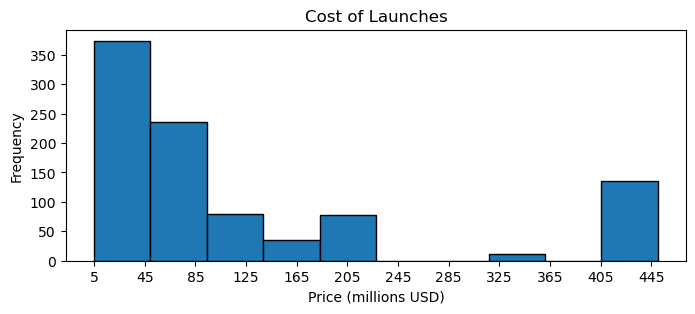

In [372]:
data = pd.to_numeric(df_data['Price'], errors='coerce').dropna().astype(int)

plt.figure(figsize=(8,3))
plt.hist(data, bins=10, edgecolor='black')
plt.xticks(range(data.min(), data.max() +1, 40))
plt.title('Cost of Launches')
plt.xlabel('Price (millions USD)')
plt.ylabel('Frequency')
plt.show()

# Used a Choropleth Map to Show the Number of Launches by Country


Some country names have changed as below:

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA

In [374]:
import re
def extract_country(location):
    match= re.search(r',\s*([A-Za-z\s]+)$',location)
    if match:
        return match.group(1)
    return None

df_data['country']= df_data['Location'].apply(extract_country)

In [375]:
df_data['country'] = df_data['country'].replace({
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
})

In [376]:
df_sorted_by_country = df_data.groupby('country').size().reset_index(name='count')
df_sorted_by_country

,country,count
0,Australia,6
1,Brazil,3
2,China,269
3,France,303
4,India,76
5,Iran,14
6,Israel,11
7,Japan,126
8,Kazakhstan,701
9,Kenya,9


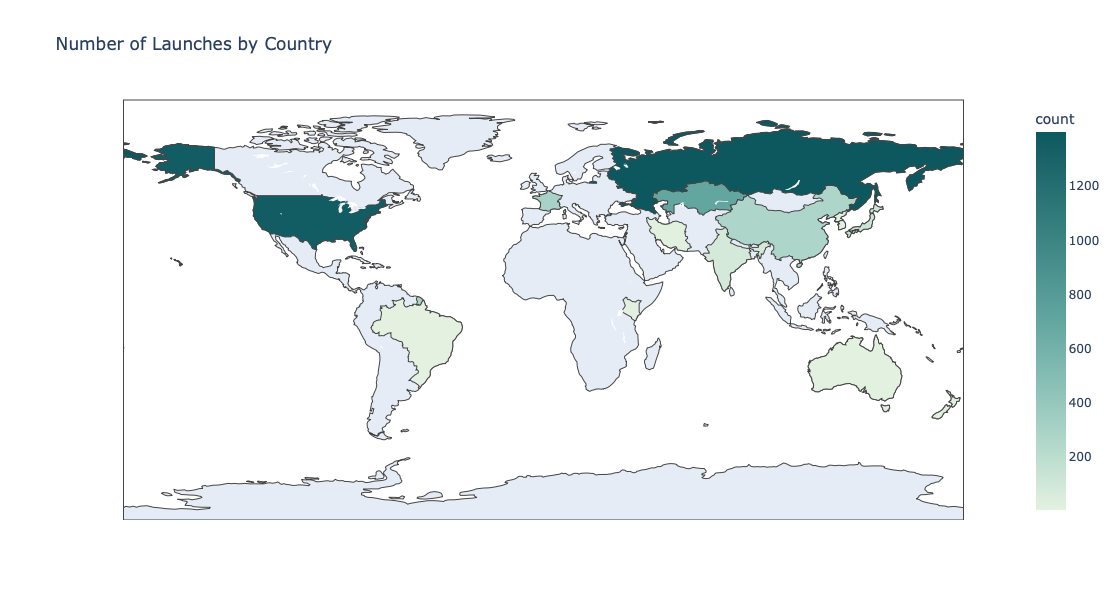

In [377]:
fig = px.choropleth(df_sorted_by_country,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    hover_name='country',
                    hover_data=['count'],
                    title='Number of Launches by Country',
                    color_continuous_scale='mint')

fig.update_layout(
    width=1000, 
    height=600  
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [379]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan


In [380]:
df_failed=df_data[df_data["Mission_Status"]== 'Failure']
df_failed_by_country= df_failed.groupby('country').size().reset_index(name='count')
df_failed_by_country

,country,count
0,Australia,3
1,Brazil,2
2,China,19
3,France,13
4,India,8
5,Iran,8
6,Israel,2
7,Japan,10
8,Kazakhstan,72
9,New Zealand,2


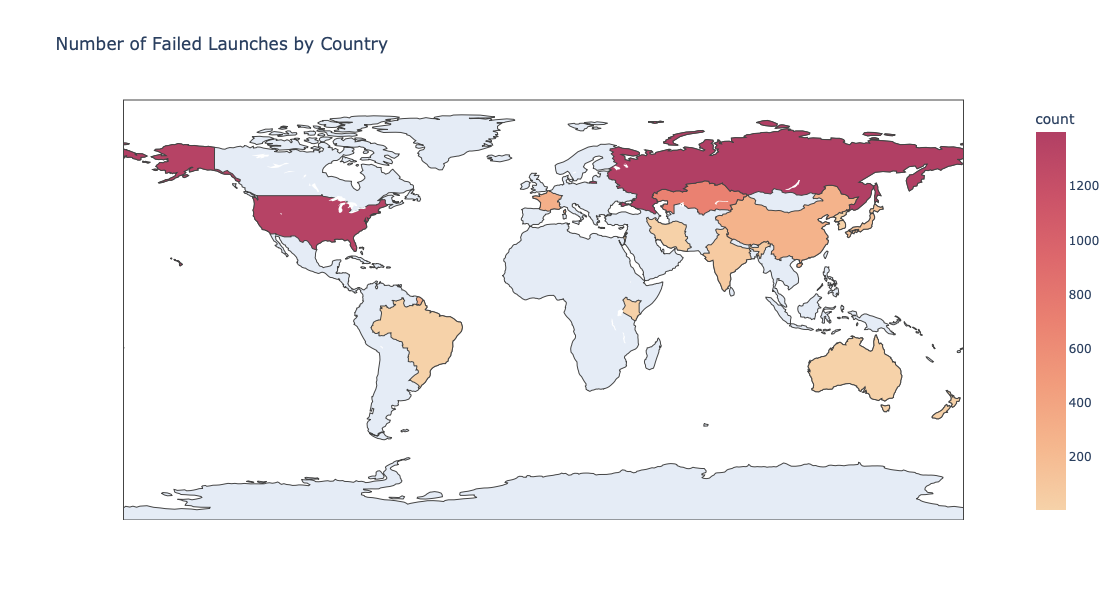

In [381]:
fig = px.choropleth(df_sorted_by_country,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    hover_name='country',
                    hover_data=['count'],
                    title='Number of Failed Launches by Country',
                    color_continuous_scale='redor')

fig.update_layout(
    width=1000, 
    height=600  
)
fig.show()

# Created a Plotly Sunburst Chart of the countries, organisations, and mission status. 

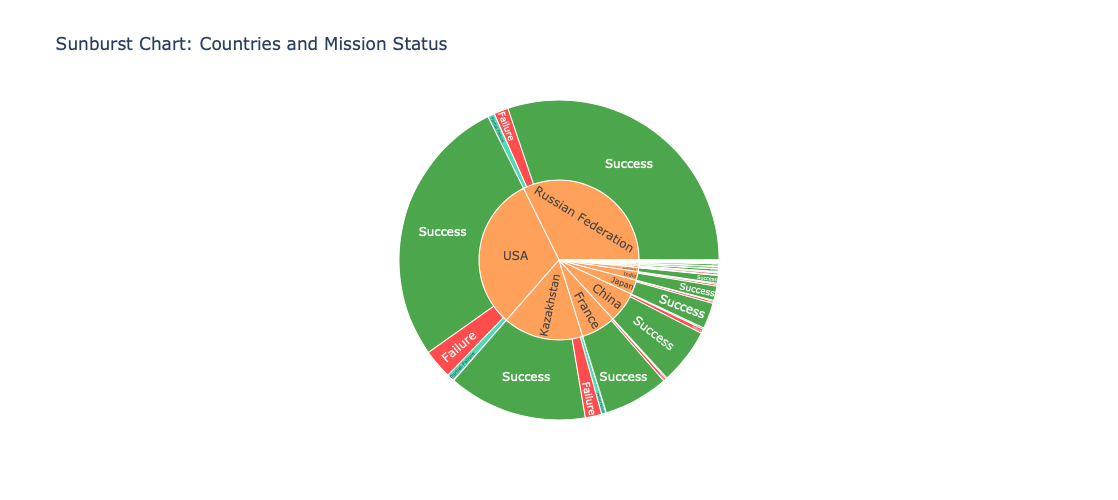

In [383]:
df_aggregated = df_data.groupby(['country', 'Mission_Status']).size().reset_index(name='count')

fig = px.sunburst(
    df_aggregated,
    path=['country', 'Mission_Status'],  # Simpler hierarchy with just country and Mission_Status
    values='count',  # Use the count of launches as the size of the slices
    title="Sunburst Chart: Countries and Mission Status",
    color='Mission_Status',  # Color by Mission_Status
    color_discrete_map={'Success': 'green', 'Failure': 'red'},  # Custom colors
    width=500,  # Adjust width for better clarity
    height=500  # Adjust height for better clarity
)

fig.show()

# The Total Amount of Money Spent by Organisation on Space Missions

In [385]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [386]:
prices_sum_by_org = df_data.groupby('Organisation')['Price'].sum().reset_index(name='price')
prices_sum_by_org=prices_sum_by_org.sort_values(by='price', ascending=False)
prices_sum_by_org.head()

,Organisation,price
35,NASA,"61,200.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"


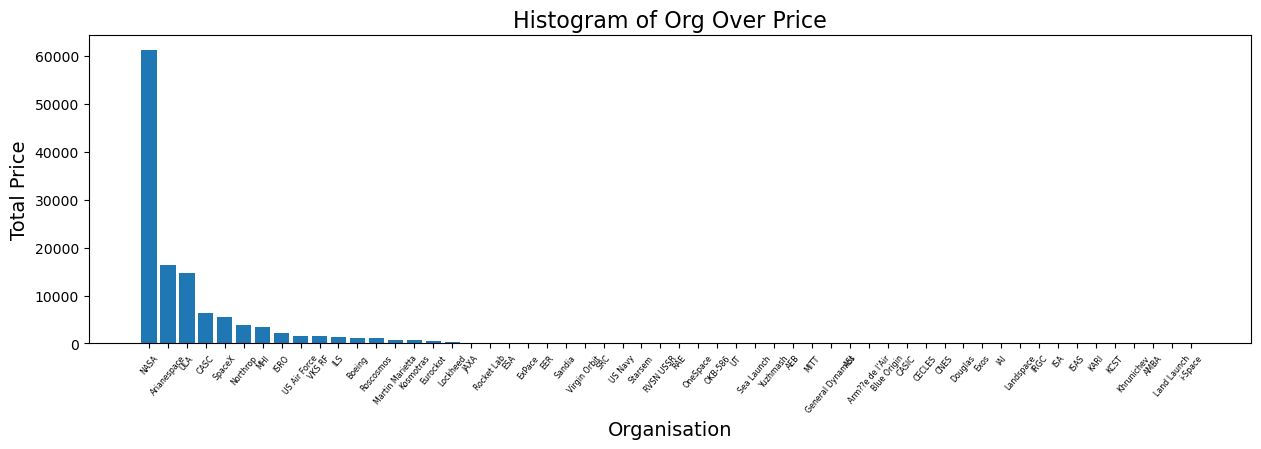

In [387]:
plt.figure(figsize=(15, 4))
plt.bar(prices_sum_by_org['Organisation'],prices_sum_by_org['price'])
plt.xlabel('Organisation', fontsize=14)
plt.xticks(rotation=50, fontsize=5.7)
plt.ylabel('Total Price', fontsize=14)
plt.title('Histogram of Org Over Price', fontsize=16);

# The Amount of Money Spent by Organisation per Launch

In [389]:
average_price_per_launch = df_data.groupby('Organisation')['Price'].mean().fillna(0).reset_index(name='avg_price')
average_price_per_launch.sample(3)

,Organisation,avg_price
29,Land Launch,0.00
16,Exos,0.00
2,ASI,0.00


# Number of Launches per Year

In [391]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year
df_data['Year'] = df_data['Year'].apply(lambda x: int(x) if pd.notna(x) else np.nan)
df_data[['Date', 'Year']].sample(5)

,Date,Year
2604,1978-03-31 14:01:00+00:00,"1,978.00"
409,2016-09-15 14:04:00+00:00,"2,016.00"
1646,1993-03-16 07:49:00+00:00,"1,993.00"
237,2018-06-06 11:12:00+00:00,"2,018.00"
1740,1991-08-14 23:15:00+00:00,"1,991.00"


In [392]:
launches_per_year = df_data.groupby('Year').size().reset_index(name='count')
launches_per_year.head()

,Year,count
0,"1,957.00",3
1,"1,958.00",22
2,"1,959.00",20
3,"1,960.00",38
4,"1,961.00",52


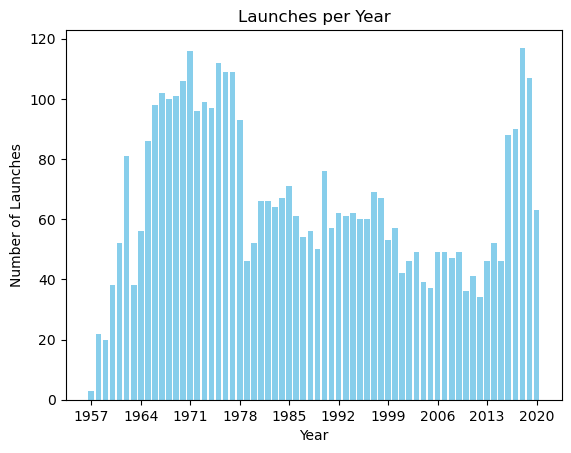

In [393]:
plt.bar(launches_per_year['Year'], launches_per_year['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Launches per Year')
plt.xticks(range(int(launches_per_year['Year'].min()), int(launches_per_year['Year'].max()+1), 7));

# Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? 

In [395]:
df_data['Month'] = df_data['Date'].dt.month
monthly_launch= df_data.groupby(['Year', 'Month']).size().reset_index(name='count')
monthly_launch['Year'] = monthly_launch['Year'].astype(int)
monthly_launch['Month'] = monthly_launch['Month'].astype(int)

In [396]:
monthly_launch['YearMonth'] = pd.to_datetime(monthly_launch['Year'].astype(str) + '-' + monthly_launch['Month'].astype(str), format='%Y-%m')
monthly_launch.head()

,Year,Month,count,YearMonth
0,1957,10,1,1957-10-01
1,1957,11,1,1957-11-01
2,1957,12,1,1957-12-01
3,1958,2,2,1958-02-01
4,1958,3,3,1958-03-01


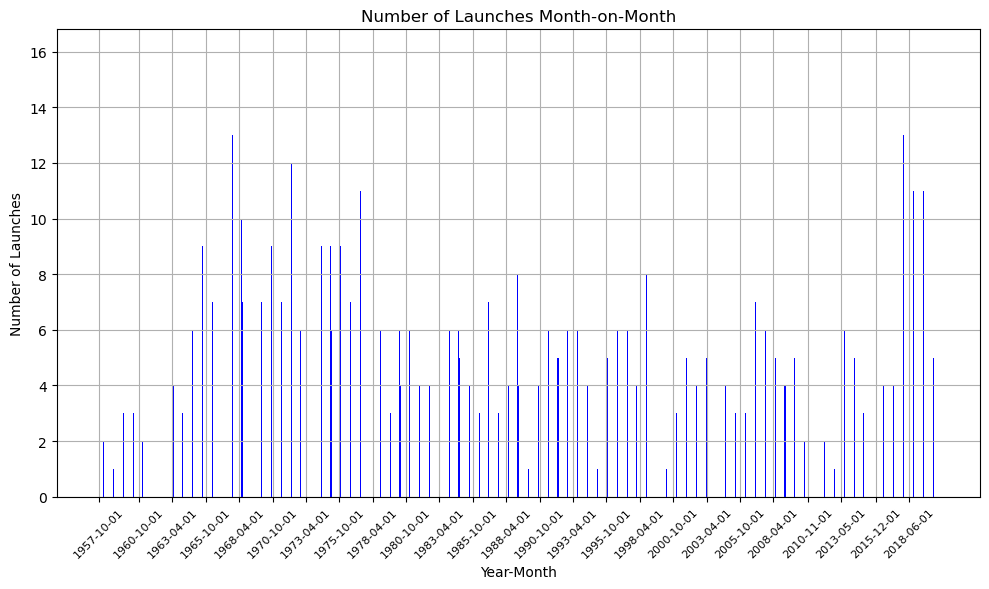

In [397]:
plt.figure(figsize=(10,6))
plt.bar(monthly_launch['YearMonth'], monthly_launch['count'], color='blue', width=3.0)
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Month-on-Month')
tick_positions = monthly_launch['YearMonth'][::30]
plt.xticks(tick_positions,rotation=45, fontsize=8)  
plt.grid(True)
plt.tight_layout()
plt.show()

# Launches per Month: Which months were most popular and least popular for launches?

In [399]:
launch_per_month= df_data.groupby('Month').size().reset_index(name='count')

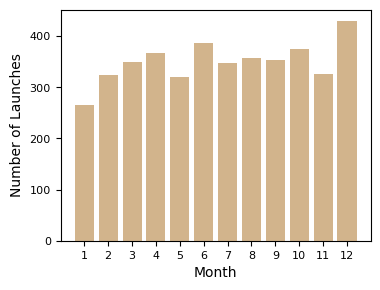

In [400]:
plt.figure(figsize=(4,3))
plt.bar(launch_per_month['Month'], launch_per_month['count'], color= 'tan')
plt.xticks(range(1,13,1))
plt.xlabel('Month', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Number of Launches', fontsize=10); # December apears to be most popular month for launch

# Launch Price Variations Over Time

In [402]:
launch_price_over_time = df_data[['Year', 'Price']].dropna().copy()

launch_price_over_time['Year'] = launch_price_over_time['Year'].astype(int)

launch_price_over_time = (
    launch_price_over_time
    .groupby('Year', as_index=False)['Price']
    .mean()
    .rename(columns={'Price': 'avg_price'})
)
launch_price_over_time.sample(3)

,Year,avg_price
2,1966,59.00
29,2004,92.74
41,2016,79.46


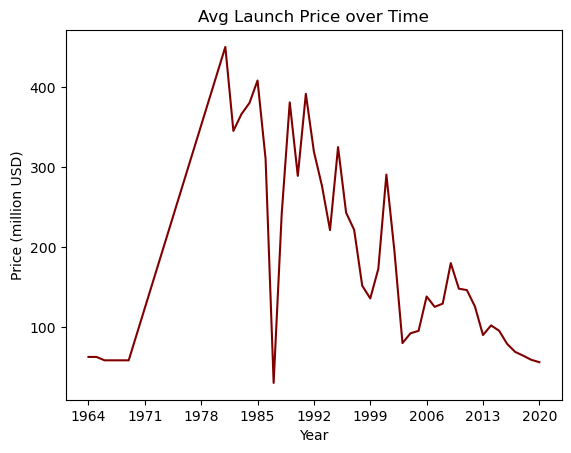

In [403]:
plt.plot(launch_price_over_time['Year'], launch_price_over_time['avg_price'],color='maroon')
plt.xlabel('Year')
plt.ylabel('Price (million USD)')
plt.xticks(range(launch_price_over_time['Year'].min(), launch_price_over_time['Year'].max()+1, 7))
plt.title('Avg Launch Price over Time');

# Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [405]:
org_with_high_launch = Launch_per_company.nlargest(10, 'Count')['Organisation']

In [406]:
df_data_largest = df_data[df_data['Organisation'].isin(org_with_high_launch)]
df_grouped = df_data_largest.groupby(by=['Year']).size().reset_index(name='Launch_Count')
df_grouped['Year']= df_grouped['Year'].astype(int)

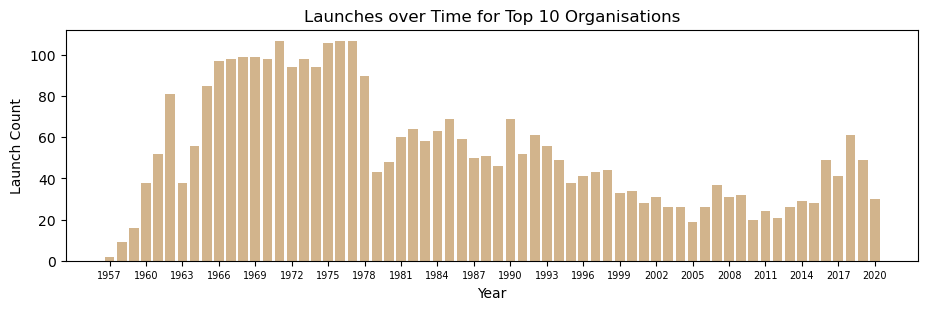

In [407]:
plt.figure(figsize=(11,3))
plt.bar(df_grouped['Year'],df_grouped['Launch_Count'], color = 'tan')
plt.xlabel('Year')
plt.ylabel('Launch Count')
plt.xticks(range(df_grouped['Year'].min(),df_grouped['Year'].max()+1, 3), fontsize=7)
plt.title('Launches over Time for Top 10 Organisations');

In [408]:
df_grouped_by_org= df_data_largest.groupby(by=['Year', 'Organisation']).size().reset_index(name='Launch_Count')
df_grouped_by_org['Year']= df_grouped_by_org['Year'].astype(int)
df_grouped_by_org.head()

,Year,Organisation,Launch_Count
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1


In [409]:
pivot_data = df_grouped_by_org.pivot(index='Year', columns='Organisation', values='Launch_Count').fillna(0)

<Figure size 1800x400 with 0 Axes>

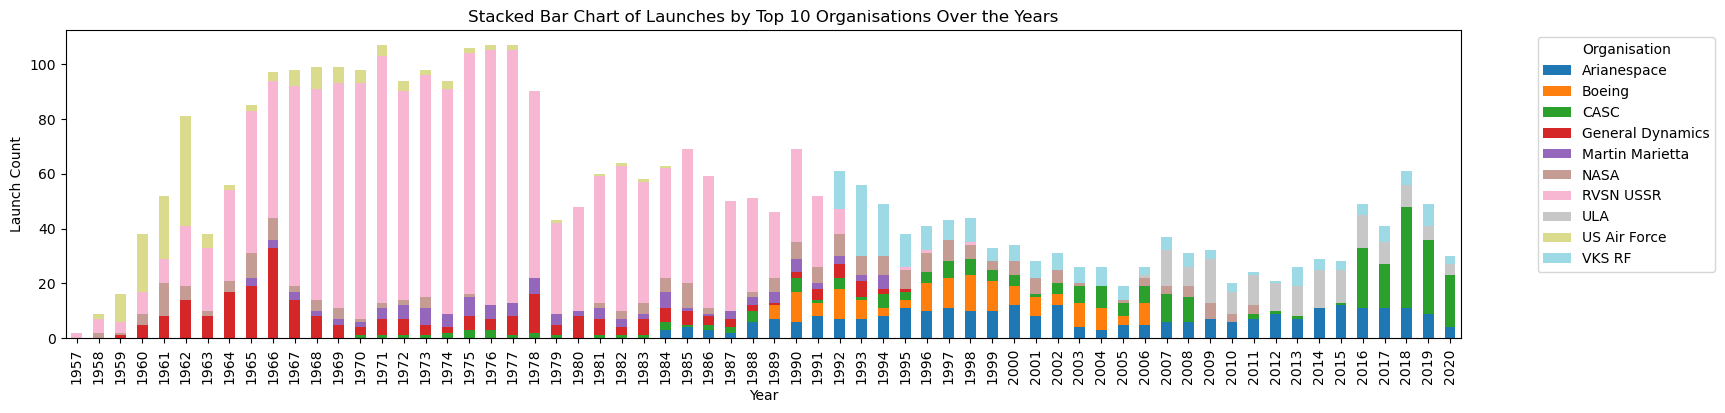

In [410]:
plt.figure(figsize=(18, 4))
pivot_data.plot(kind='bar', stacked=True, figsize=(18, 4), cmap='tab20')
plt.title('Stacked Bar Chart of Launches by Top 10 Organisations Over the Years')
plt.xlabel('Year')
plt.ylabel('Launch Count')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left');

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [412]:
launches_cold_war = df_data[
    (df_data['Year'] <= 1991) & 
    (df_data['country'].isin(['Russian Federation', 'USA', 'Kazakhstan']))
].copy()  

launches_cold_war.loc[:, 'country'] = launches_cold_war['country'].replace(
    {'Russian Federation': 'USSR', 'Kazakhstan': 'USSR'}
)

launches_cold_war = launches_cold_war.groupby('country').size().reset_index(name='count')

launches_cold_war = launches_cold_war.set_index('country')

## Plotly Pie Chart to compare the total number of launches of the USSR and the USA

Former Soviet Republics like Kazakhstan is included in USSR when analysing the total number of launches. 

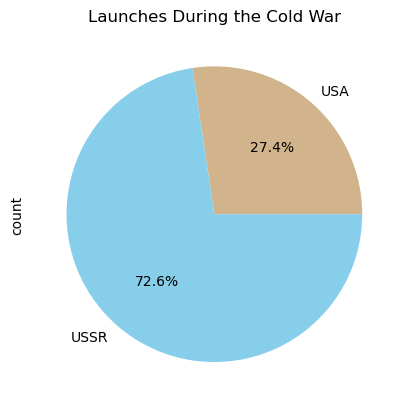

In [414]:
launches_cold_war.plot(kind='pie', y='count',autopct='%1.1f%%', legend=False, colors=["tan", "skyblue"])
plt.title('Launches During the Cold War');

## Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [416]:
superpowers_launches = df_data[df_data['country'].isin(['USA', 'Russian Federation', 'Kazakhstan'])].replace(
    {'Russian Federation': 'USSR', 'Kazakhstan': 'USSR'}).groupby(by=['Year', 'country']).size().reset_index(name='count')
superpowers_launches['Year']=superpowers_launches['Year'].astype(int)
superpowers_launches = superpowers_launches.pivot(index='Year', columns='country', values='count')

<Figure size 1800x400 with 0 Axes>

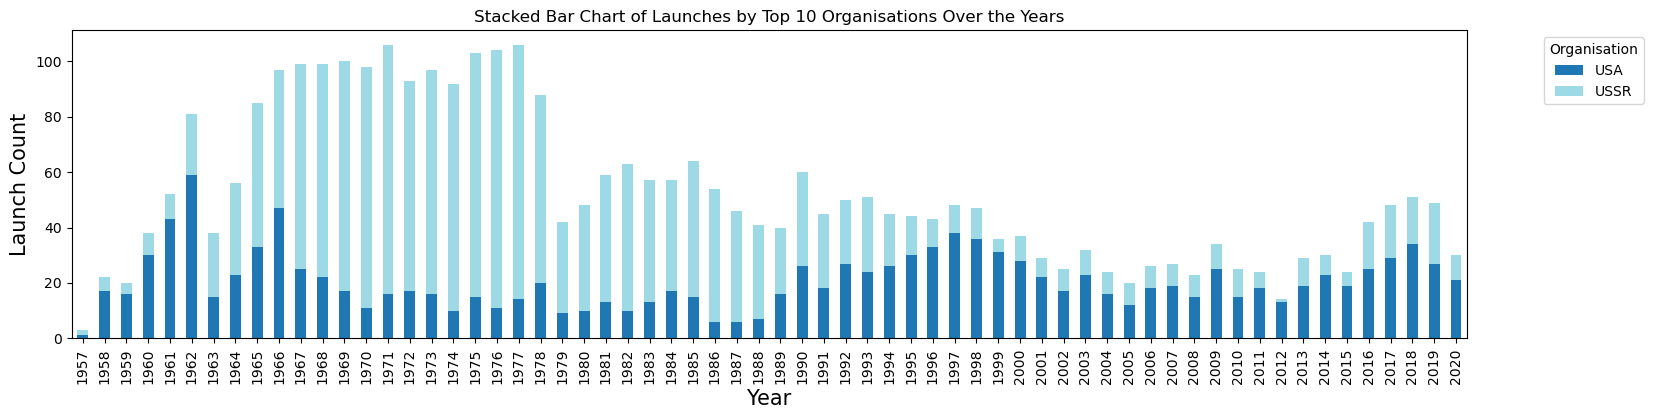

In [417]:
plt.figure(figsize=(18, 4))
superpowers_launches.plot(kind= 'bar', stacked=True, figsize=(18, 4), cmap='tab20')
plt.title('Stacked Bar Chart of Launches by Top 10 Organisations Over the Years')
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Launch Count', fontsize= 15)
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left');

## Total Number of Mission Failures Year on Year.

In [419]:
failed_launches = (df_data[df_data['Mission_Status'].
                   isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])].groupby('Year').size().reset_index(name='count')
                  )
failed_launches[['Year', 'count']] = failed_launches[['Year', 'count']].astype(int)

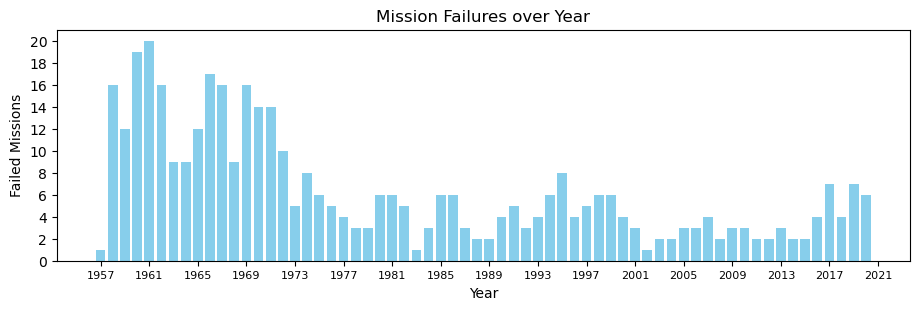

In [420]:
plt.figure(figsize=(11, 3))
plt.bar(failed_launches['Year'], failed_launches['count'], color='skyblue')
plt.title('Mission Failures over Year')
plt.xlabel('Year')
plt.ylabel('Failed Missions')
plt.yticks(range(0, failed_launches['count'].max()+1, 2))
plt.xticks(range(failed_launches['Year'].min(), failed_launches['Year'].max()+2, 4), fontsize=8);

## Percentage of Failures over Time

In [422]:
failed_launches_rt = (df_data.groupby(by=['Year', 'Mission_Status'])
                      .size()
                      .reset_index(name='count')
                      .replace({'Failure': 'Failure', 'Partial Failure': 'Failure', 'Prelaunch Failure': 'Failure'}))
year_total = failed_launches_rt.groupby('Year')['count'].transform('sum')
failed_launches_rt['year_total'] = year_total
failed_launches_rt['rate']= failed_launches_rt['count']/failed_launches_rt['year_total']*100
failed_launches_rt = failed_launches_rt[failed_launches_rt['Mission_Status'] != 'Success']
failed_launches_rt['Year']= failed_launches_rt['Year'].astype(int)

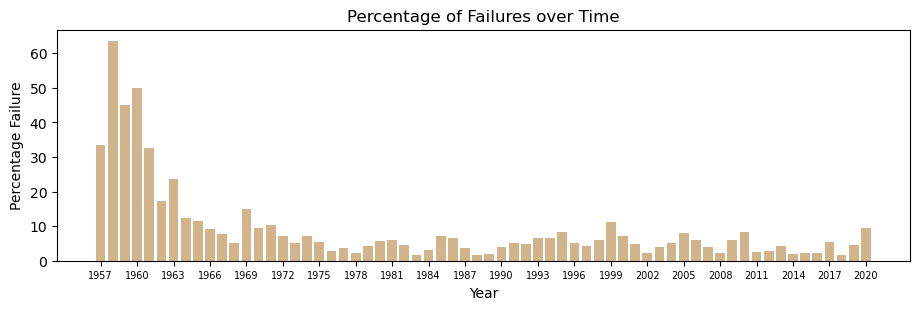

In [423]:
plt.figure(figsize=(11, 3))
plt.bar(failed_launches_rt['Year'], failed_launches_rt['rate'], color= 'tan')
plt.xlabel('Year')
plt.xticks(range(failed_launches_rt['Year'].min() , failed_launches_rt['Year'].max() +1, 3), fontsize=7)
plt.ylabel('Percentage Failure')
plt.title('Percentage of Failures over Time');

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

In [425]:
lead_country_by_year = df_data.groupby(by=['Year', 'Organisation']).size().reset_index(name='count')
lead_country_by_year['lead_org'] = (lead_country_by_year['Organisation'][lead_country_by_year['count']==lead_country_by_year
                                    .groupby('Year')['count'].transform('max')]
                                   )
lead_country_by_year['Year']=lead_country_by_year['Year'].astype(int)
lead_country_by_year.dropna(axis=0, subset= 'lead_org', inplace=True)
lead_country_by_year.drop(columns=['Organisation', 'count'], axis=1).reset_index(drop=True)

,Year,lead_org
0,1957,RVSN USSR
1,1958,AMBA
2,1959,US Air Force
3,1960,US Air Force
4,1961,US Air Force
...,...,...
66,2016,CASC
67,2017,SpaceX
68,2018,CASC
69,2019,CASC
